In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Chargeons le fichier hmeq
file_path = 'C:/Users\HP/OneDrive/Bureau/M2 IMSD/Cours/SCORING/01_Projet_2024/hmeq.csv'
hmeq_data = pd.read_csv(file_path)

# Aperçu des 10 premières lignes et informations générales sur le dataset
hmeq_head = hmeq_data.head(9)
hmeq_head

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_8988\1395230334.py:2: SyntaxWarning: invalid escape sequence '\H'
  file_path = 'C:/Users\HP/OneDrive/Bureau/M2 IMSD/Cours/SCORING/01_Projet_2024/hmeq.csv'


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN


In [3]:
hmeq_info = hmeq_data.info()
hmeq_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
# Suppression des lignes où les colonnes 'JOB' et 'REASON' ont des valeurs manquantes (avec un faible taux)
# hmeq_data = hmeq_data.dropna(subset=['JOB', 'REASON'])

In [5]:
missing_summary = hmeq_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_summary / len(hmeq_data)) * 100
print(pd.concat([missing_summary, missing_percentage], axis=1, keys=['Count', 'Percentage']))

         Count  Percentage
DEBTINC   1267   21.258389
DEROG      708   11.879195
DELINQ     580    9.731544
MORTDUE    518    8.691275
YOJ        515    8.640940
NINQ       510    8.557047
CLAGE      308    5.167785
JOB        279    4.681208
REASON     252    4.228188
CLNO       222    3.724832
VALUE      112    1.879195
BAD          0    0.000000
LOAN         0    0.000000


In [6]:
print(hmeq_data.dtypes)

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


In [18]:
# convertir la variable 'BAD' en catégorielle
hmeq_data['BAD'] = hmeq_data['BAD'].astype(object)
print(hmeq_data.dtypes)

BAD         object
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


# Statistiques Descriptives

In [22]:
hmeq_description = hmeq_data.describe()
hmeq_description

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18607.969799,73001.041812,101540.387423,8.756166,0.224329,0.405705,179.440725,1.170134,21.247819,34.000651
std,11207.480417,42552.726779,56869.436682,7.259424,0.798458,1.079256,83.574697,1.653866,9.951308,7.644528
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [9]:
hmeq_data.describe(include= "object")

,BAD,REASON,JOB
count,5536,5536,5536
unique,2,2,6
top,0,DebtCon,Other
freq,4408,3813,2320


In [10]:
# from scipy.stats import chi2_contingency

# Pour REASON
# contingency_table_reason = pd.crosstab(hmeq_data['REASON'], hmeq_data['BAD'])
# chi2, p_value, dof, expected = chi2_contingency(contingency_table_reason)
# print(f"Test du chi-carré pour 'REASON' : p-value = {p_value}")

# Pour JOB
# contingency_table_job = pd.crosstab(hmeq_data['JOB'], hmeq_data['BAD'])
# chi2, p_value, dof, expected = chi2_contingency(contingency_table_job)
# print(f"Test du chi-carré pour 'JOB' : p-value = {p_value}")


# Distribution des données avant imputation

* ## 1-Variables numériques

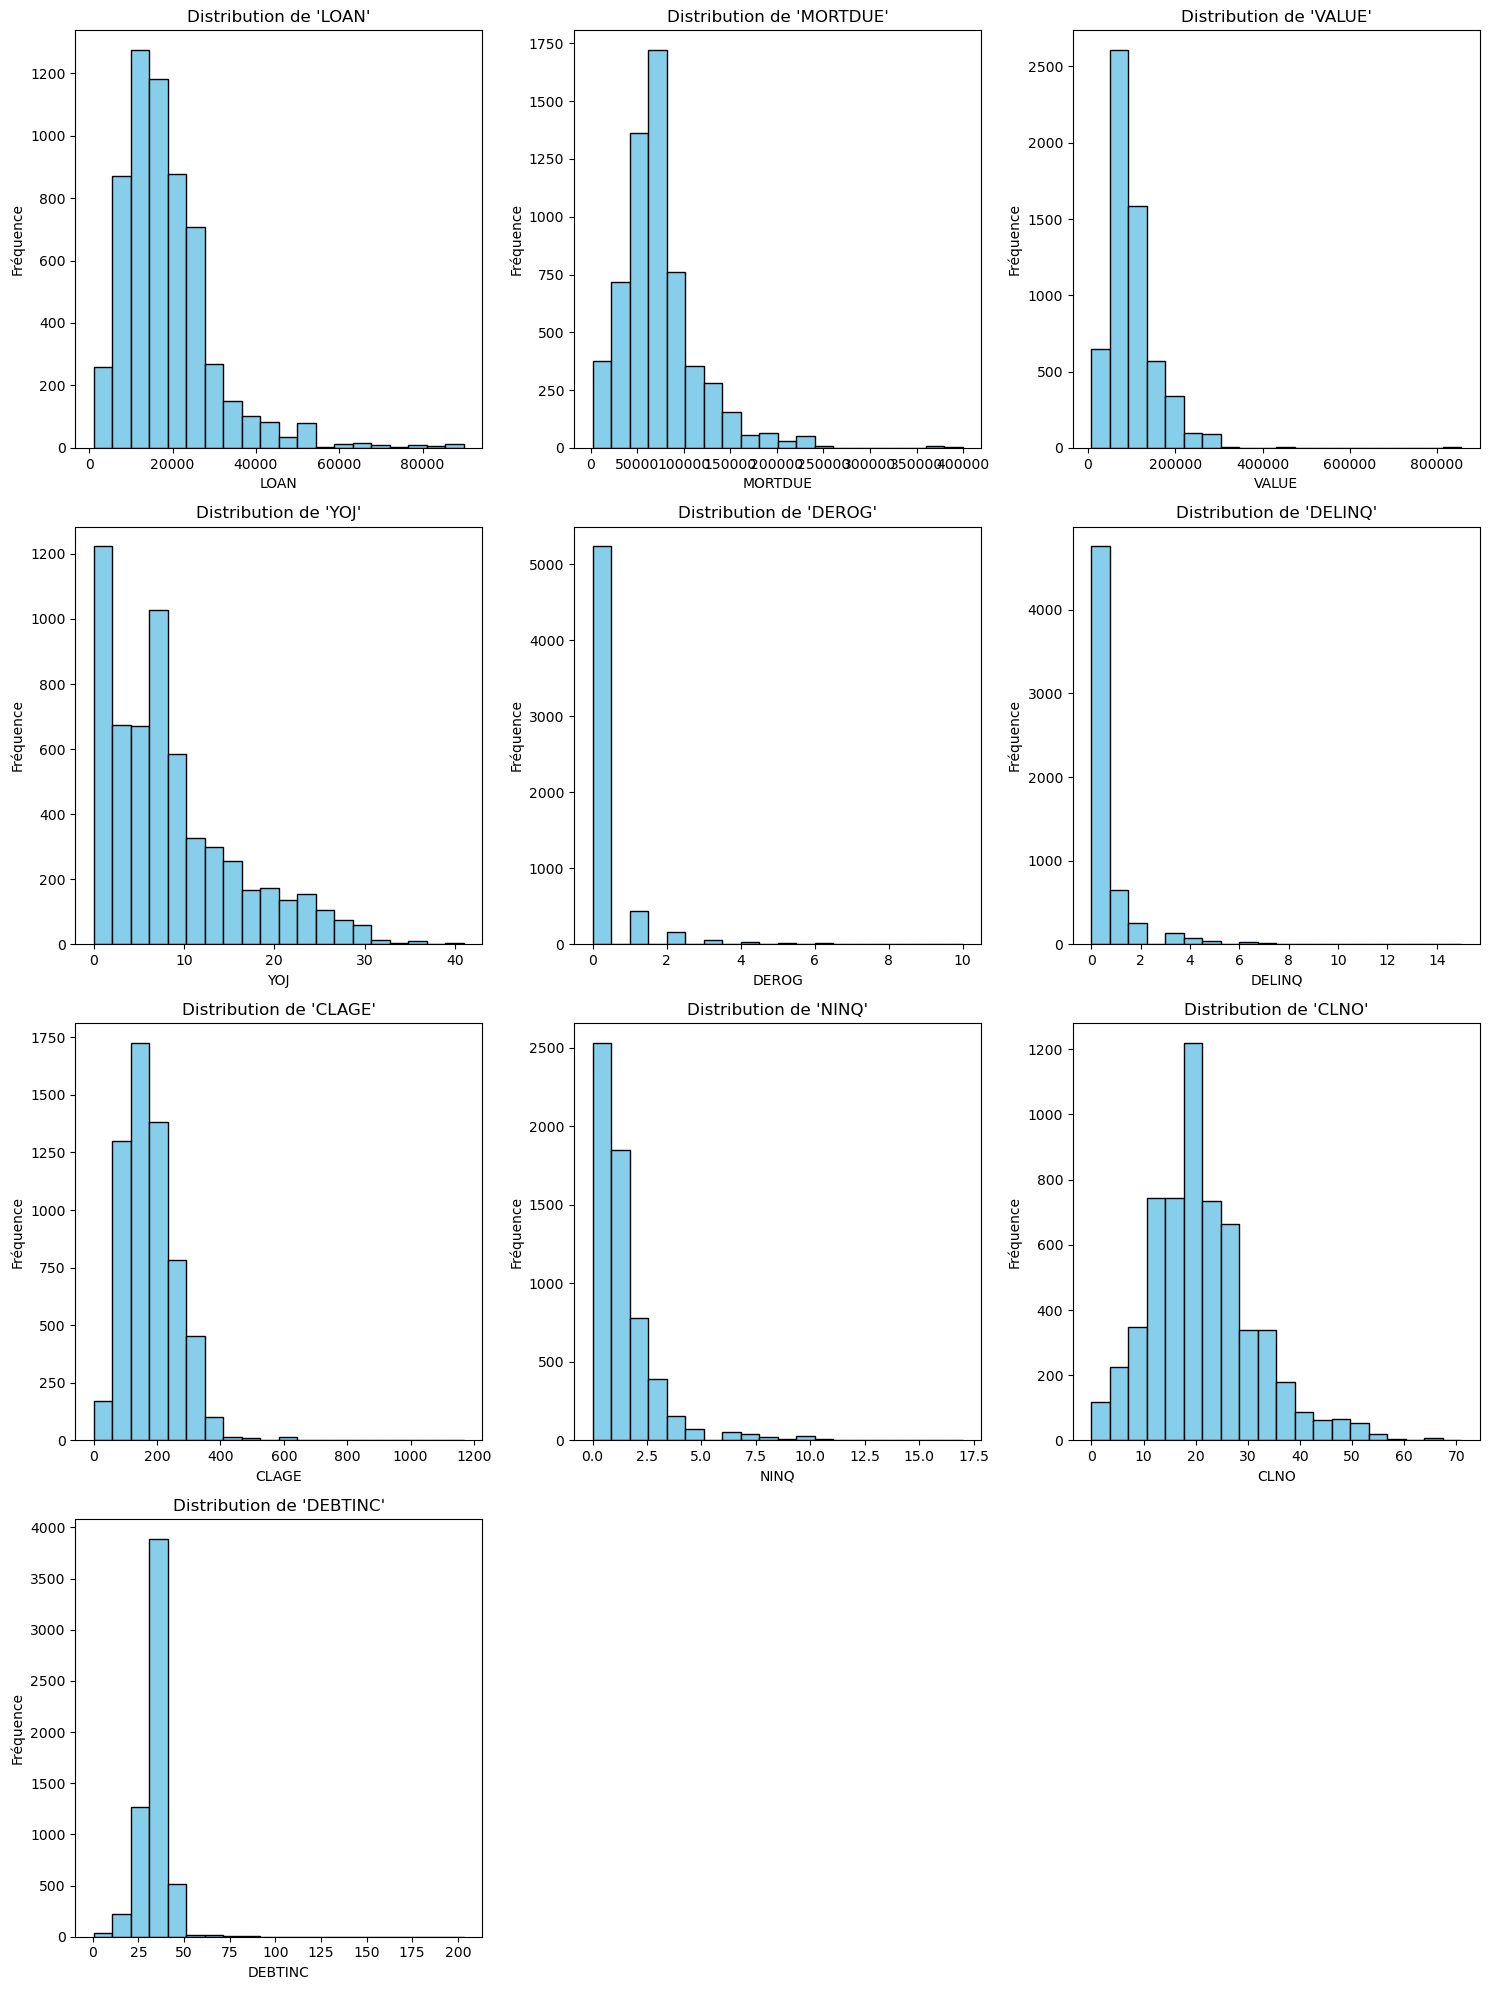

In [19]:
# Liste des variables numériques
numeric_vars = hmeq_data.select_dtypes(include=['float64', 'int64']).columns

# Configuration du layout des sous-graphiques
num_plots = len(numeric_vars)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculer le nombre de lignes nécessaires
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))

# Aplatir les axes pour un accès facile
axes = axes.flatten()

# Itérer sur chaque variable numérique et créer un histogramme
for i, var in enumerate(numeric_vars):
    axes[i].hist(hmeq_data[var].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution de '{var}'")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Supprimer les axes inutilisés s'il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


* ## 2-Variables catégorielles

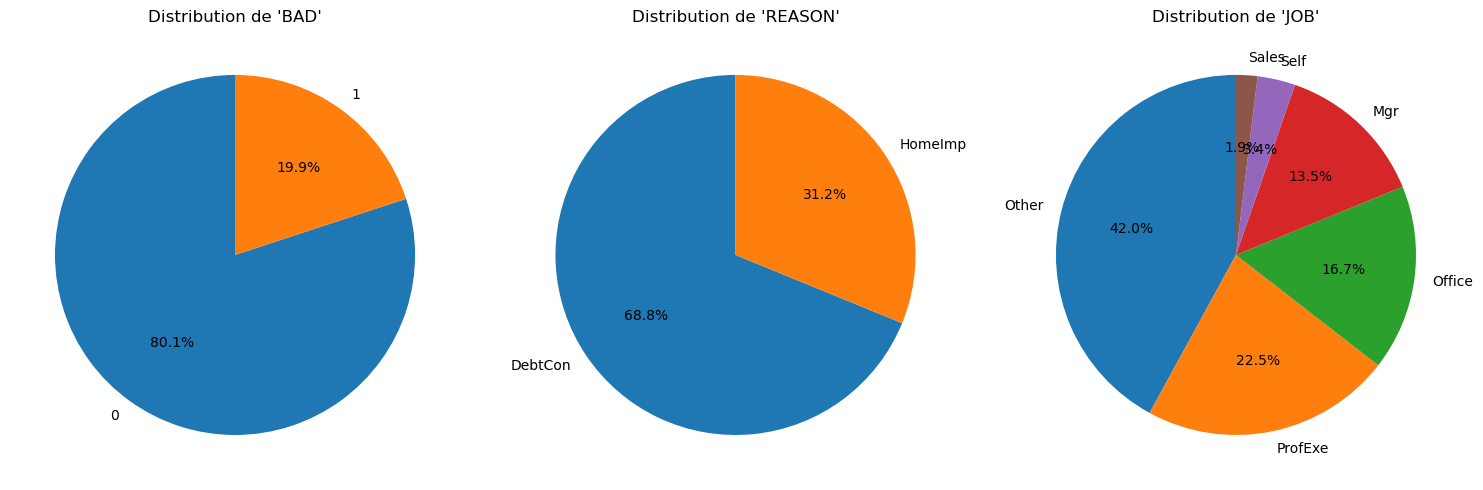

In [6]:
# Liste des variables catégorielles
categorical_vars = ['BAD', 'REASON', 'JOB']

# Configuration du layout des sous-graphiques
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(15, 5))

# Itérer sur chaque variable catégorielle et créer un pie chart
for i, var in enumerate(categorical_vars):
    counts = hmeq_data[var].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Distribution de '{var}'")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


# Gestion des valeurs manquantes

* ## sur variables numériques :

In [10]:
#Imputer les données manquantes numériques par la médiane
imputer_numeric = SimpleImputer(strategy='median')
hmeq_data[['DEBTINC', 'DEROG', 'DELINQ', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE']] = imputer_numeric.fit_transform(hmeq_data[['DEBTINC', 'DEROG', 'DELINQ', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE']])

* ## sur les variables catégorielles REASON et JOB :

In [13]:
# Imputation des valeurs manquantes pour la variable 'JOB' par le mode
mode_job = hmeq_data['JOB'].mode()[0]  
hmeq_data['JOB'].fillna(mode_job, inplace=True)  # Imputer les valeurs manquantes

# Imputation des valeurs manquantes pour la variable 'REASON' par le mode
mode_reason = hmeq_data['REASON'].mode()[0]  # Trouver la valeur la plus fréquente
hmeq_data['REASON'].fillna(mode_reason, inplace=True)  # Imputer les valeurs manquantes


In [15]:
hmeq_data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# On refait la distribution des données après imputation pour voir s'il n'y a pas de changement significative.

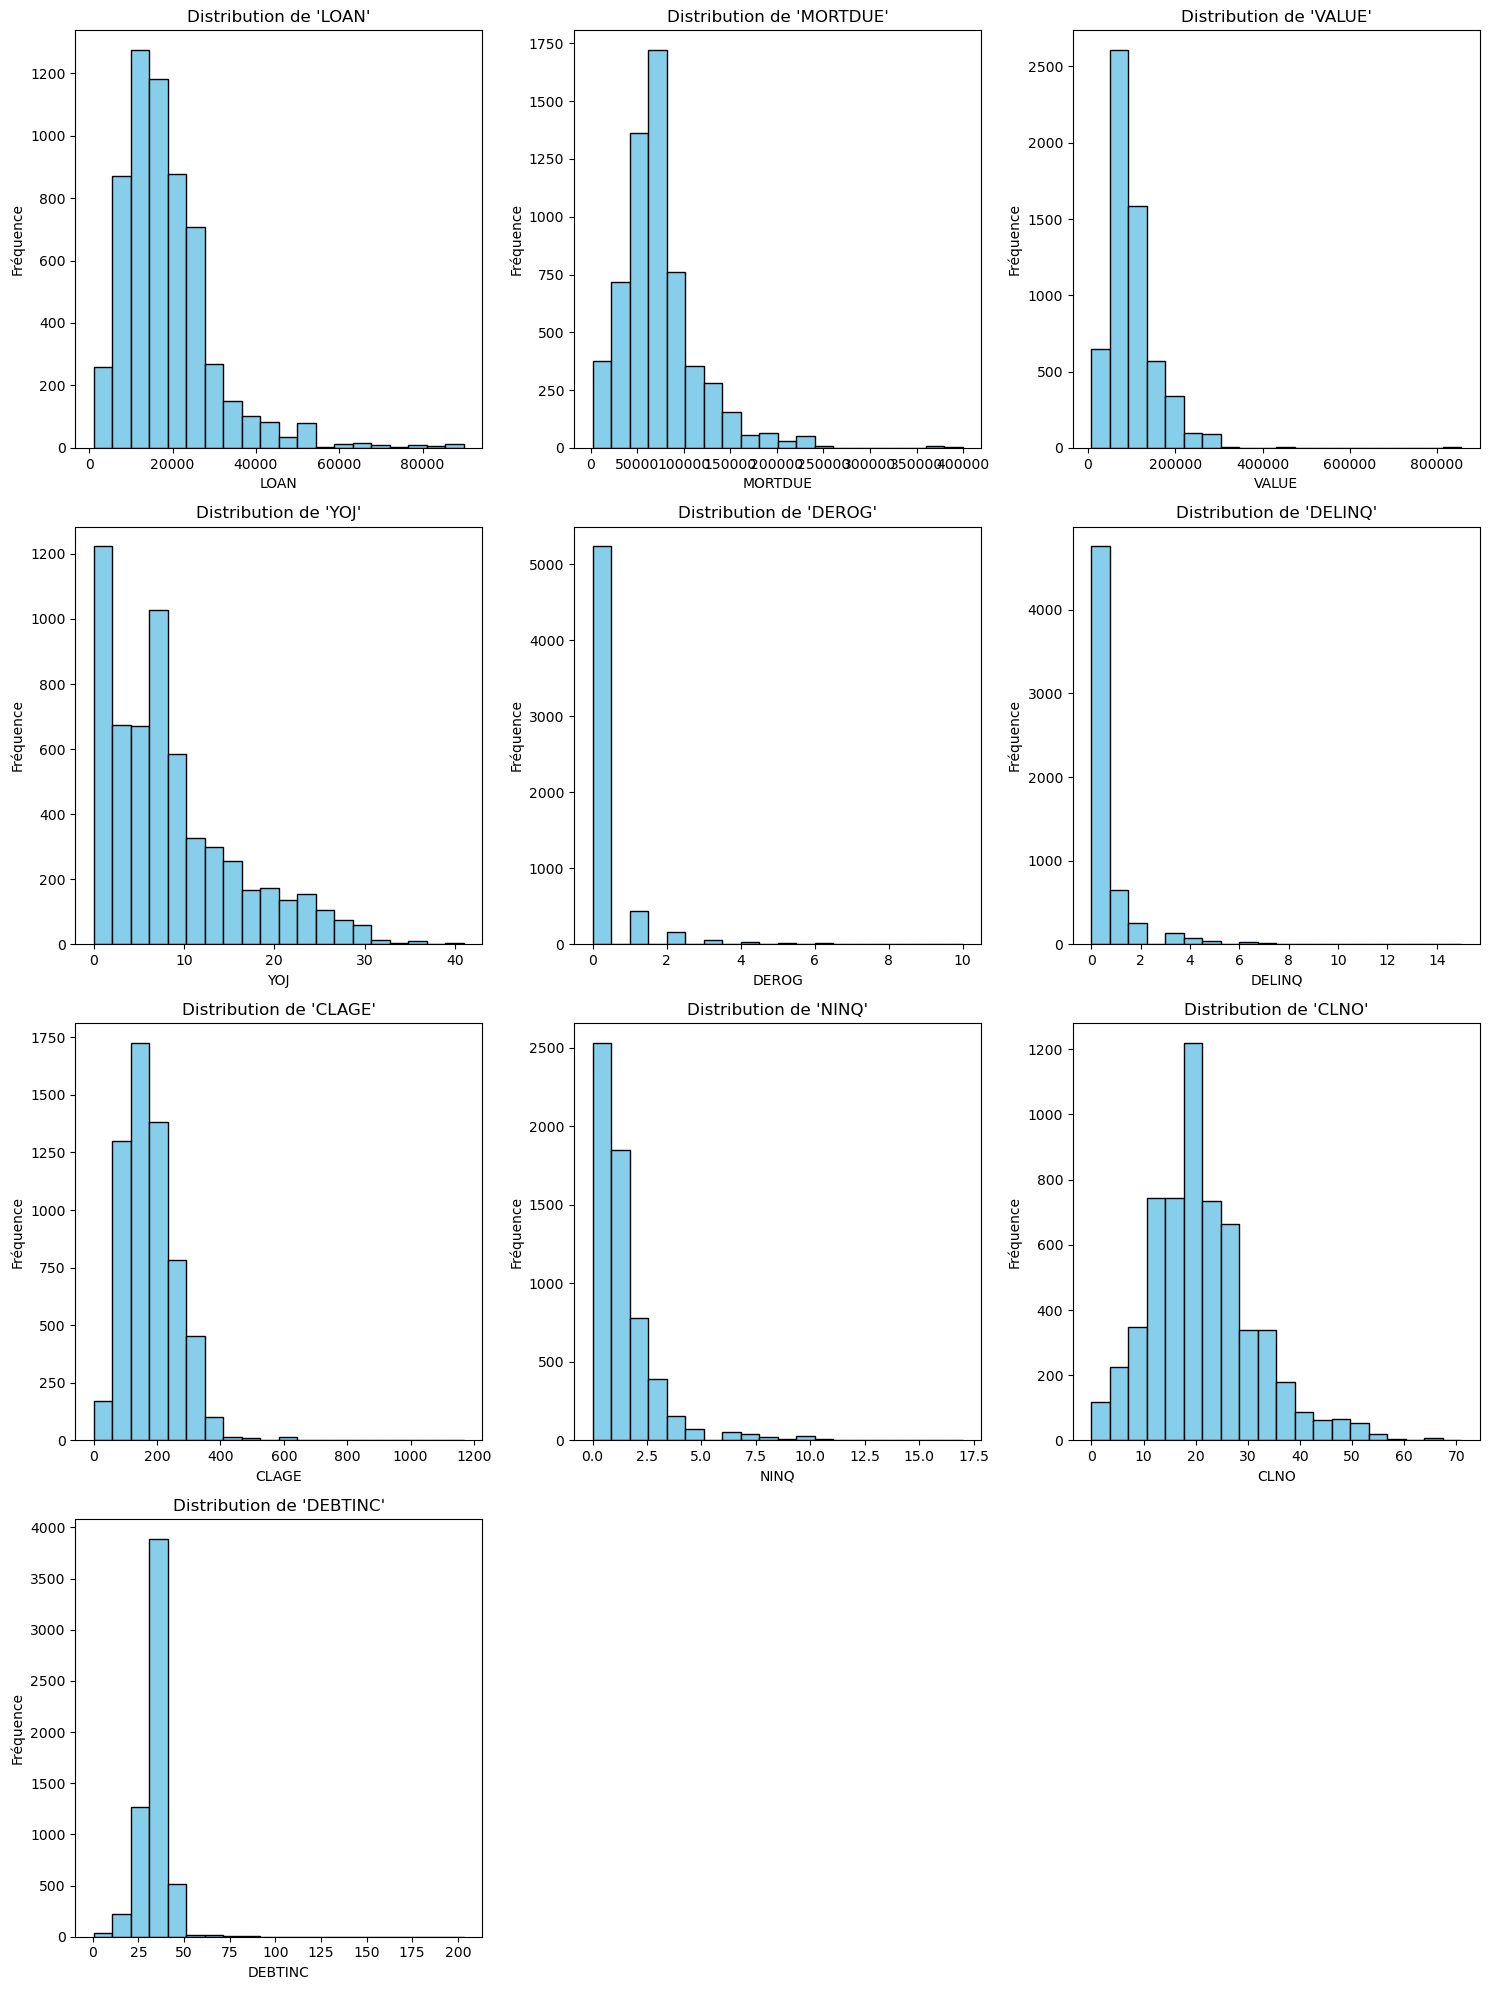

In [20]:
# Liste des variables numériques
numeric_vars = hmeq_data.select_dtypes(include=['float64', 'int64']).columns

# Configuration du layout des sous-graphiques
num_plots = len(numeric_vars)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculer le nombre de lignes nécessaires
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))

# Aplatir les axes pour un accès facile
axes = axes.flatten()

# Itérer sur chaque variable numérique et créer un histogramme
for i, var in enumerate(numeric_vars):
    axes[i].hist(hmeq_data[var].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution de '{var}'")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fréquence")

# Supprimer les axes inutilisés s'il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


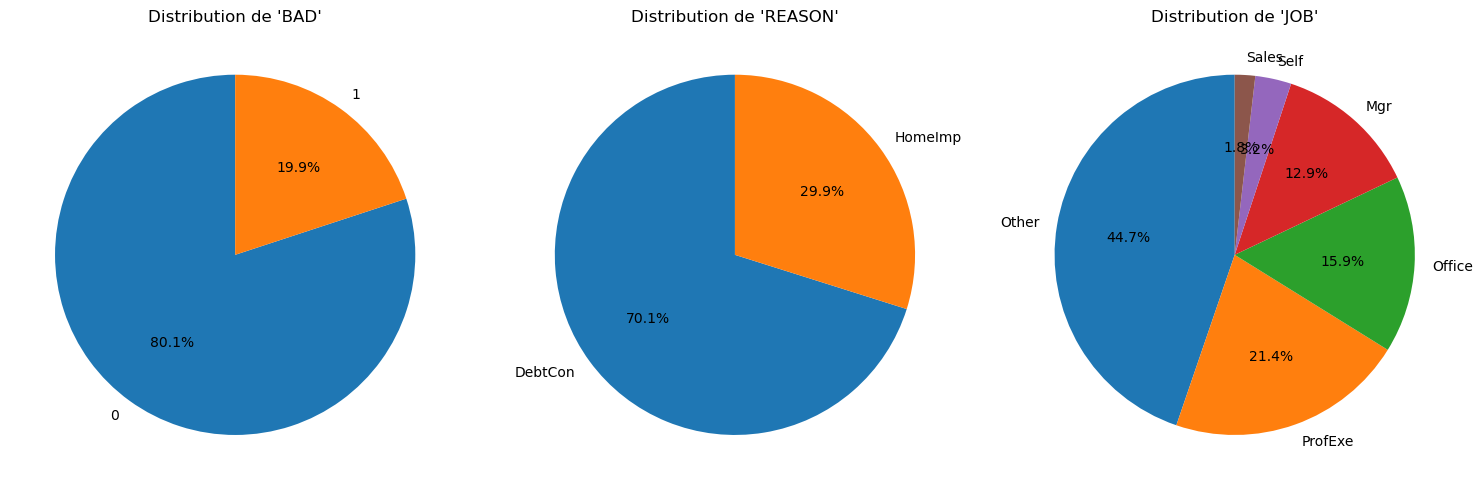

In [21]:
# Liste des variables catégorielles
categorical_vars = ['BAD', 'REASON', 'JOB']

# Configuration du layout des sous-graphiques
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(15, 5))

# Itérer sur chaque variable catégorielle et créer un pie chart
for i, var in enumerate(categorical_vars):
    counts = hmeq_data[var].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Distribution de '{var}'")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

* ## Analyse bivariée entre 'BAD' et les autres variables

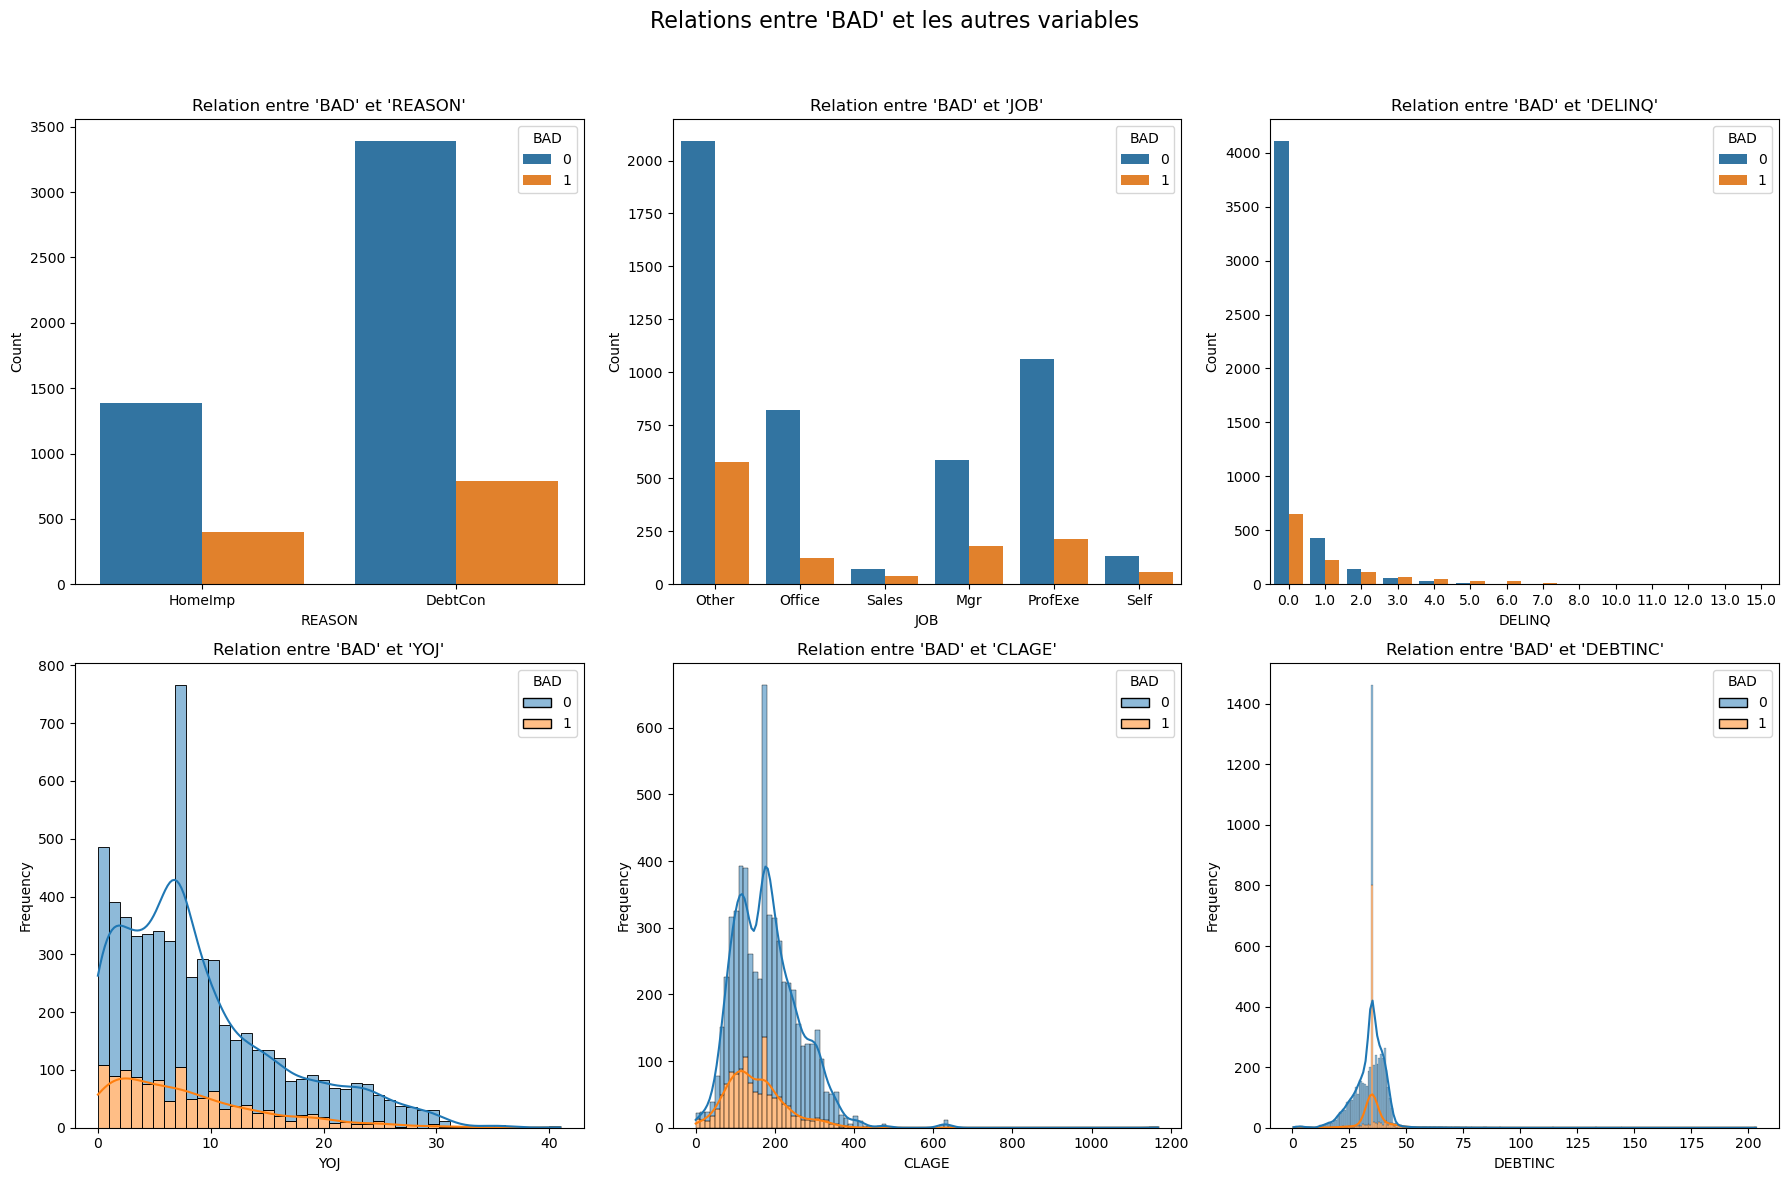

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure avec une grille de sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Relations entre 'BAD' et les autres variables", fontsize=16)

# Graphique pour 'REASON' (catégorielle)
sns.countplot(x='REASON', hue='BAD', data=hmeq_data, ax=axes[0, 0])
axes[0, 0].set_title("Relation entre 'BAD' et 'REASON'")
axes[0, 0].set_xlabel('REASON')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='BAD')

# Graphique pour 'JOB' (catégorielle)
sns.countplot(x='JOB', hue='BAD', data=hmeq_data, ax=axes[0, 1])
axes[0, 1].set_title("Relation entre 'BAD' et 'JOB'")
axes[0, 1].set_xlabel('JOB')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='BAD')

# Graphique pour 'DELINQ' (numérique discret)
sns.countplot(x='DELINQ', hue='BAD', data=hmeq_data, ax=axes[0, 2])
axes[0, 2].set_title("Relation entre 'BAD' et 'DELINQ'")
axes[0, 2].set_xlabel('DELINQ')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='BAD')

# Histogramme pour 'YOJ' (numérique continu)
sns.histplot(data=hmeq_data, x='YOJ', hue='BAD', kde=True, ax=axes[1, 0], multiple='stack')
axes[1, 0].set_title("Relation entre 'BAD' et 'YOJ'")
axes[1, 0].set_xlabel('YOJ')
axes[1, 0].set_ylabel('Frequency')

# Histogramme pour 'CLAGE' (numérique continu)
sns.histplot(data=hmeq_data, x='CLAGE', hue='BAD', kde=True, ax=axes[1, 1], multiple='stack')
axes[1, 1].set_title("Relation entre 'BAD' et 'CLAGE'")
axes[1, 1].set_xlabel('CLAGE')
axes[1, 1].set_ylabel('Frequency')

# Histogramme pour 'DEBTINC' (numérique continu)
sns.histplot(data=hmeq_data, x='DEBTINC', hue='BAD', kde=True, ax=axes[1, 2], multiple='stack')
axes[1, 2].set_title("Relation entre 'BAD' et 'DEBTINC'")
axes[1, 2].set_xlabel('DEBTINC')
axes[1, 2].set_ylabel('Frequency')

# Ajustement des espacements
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


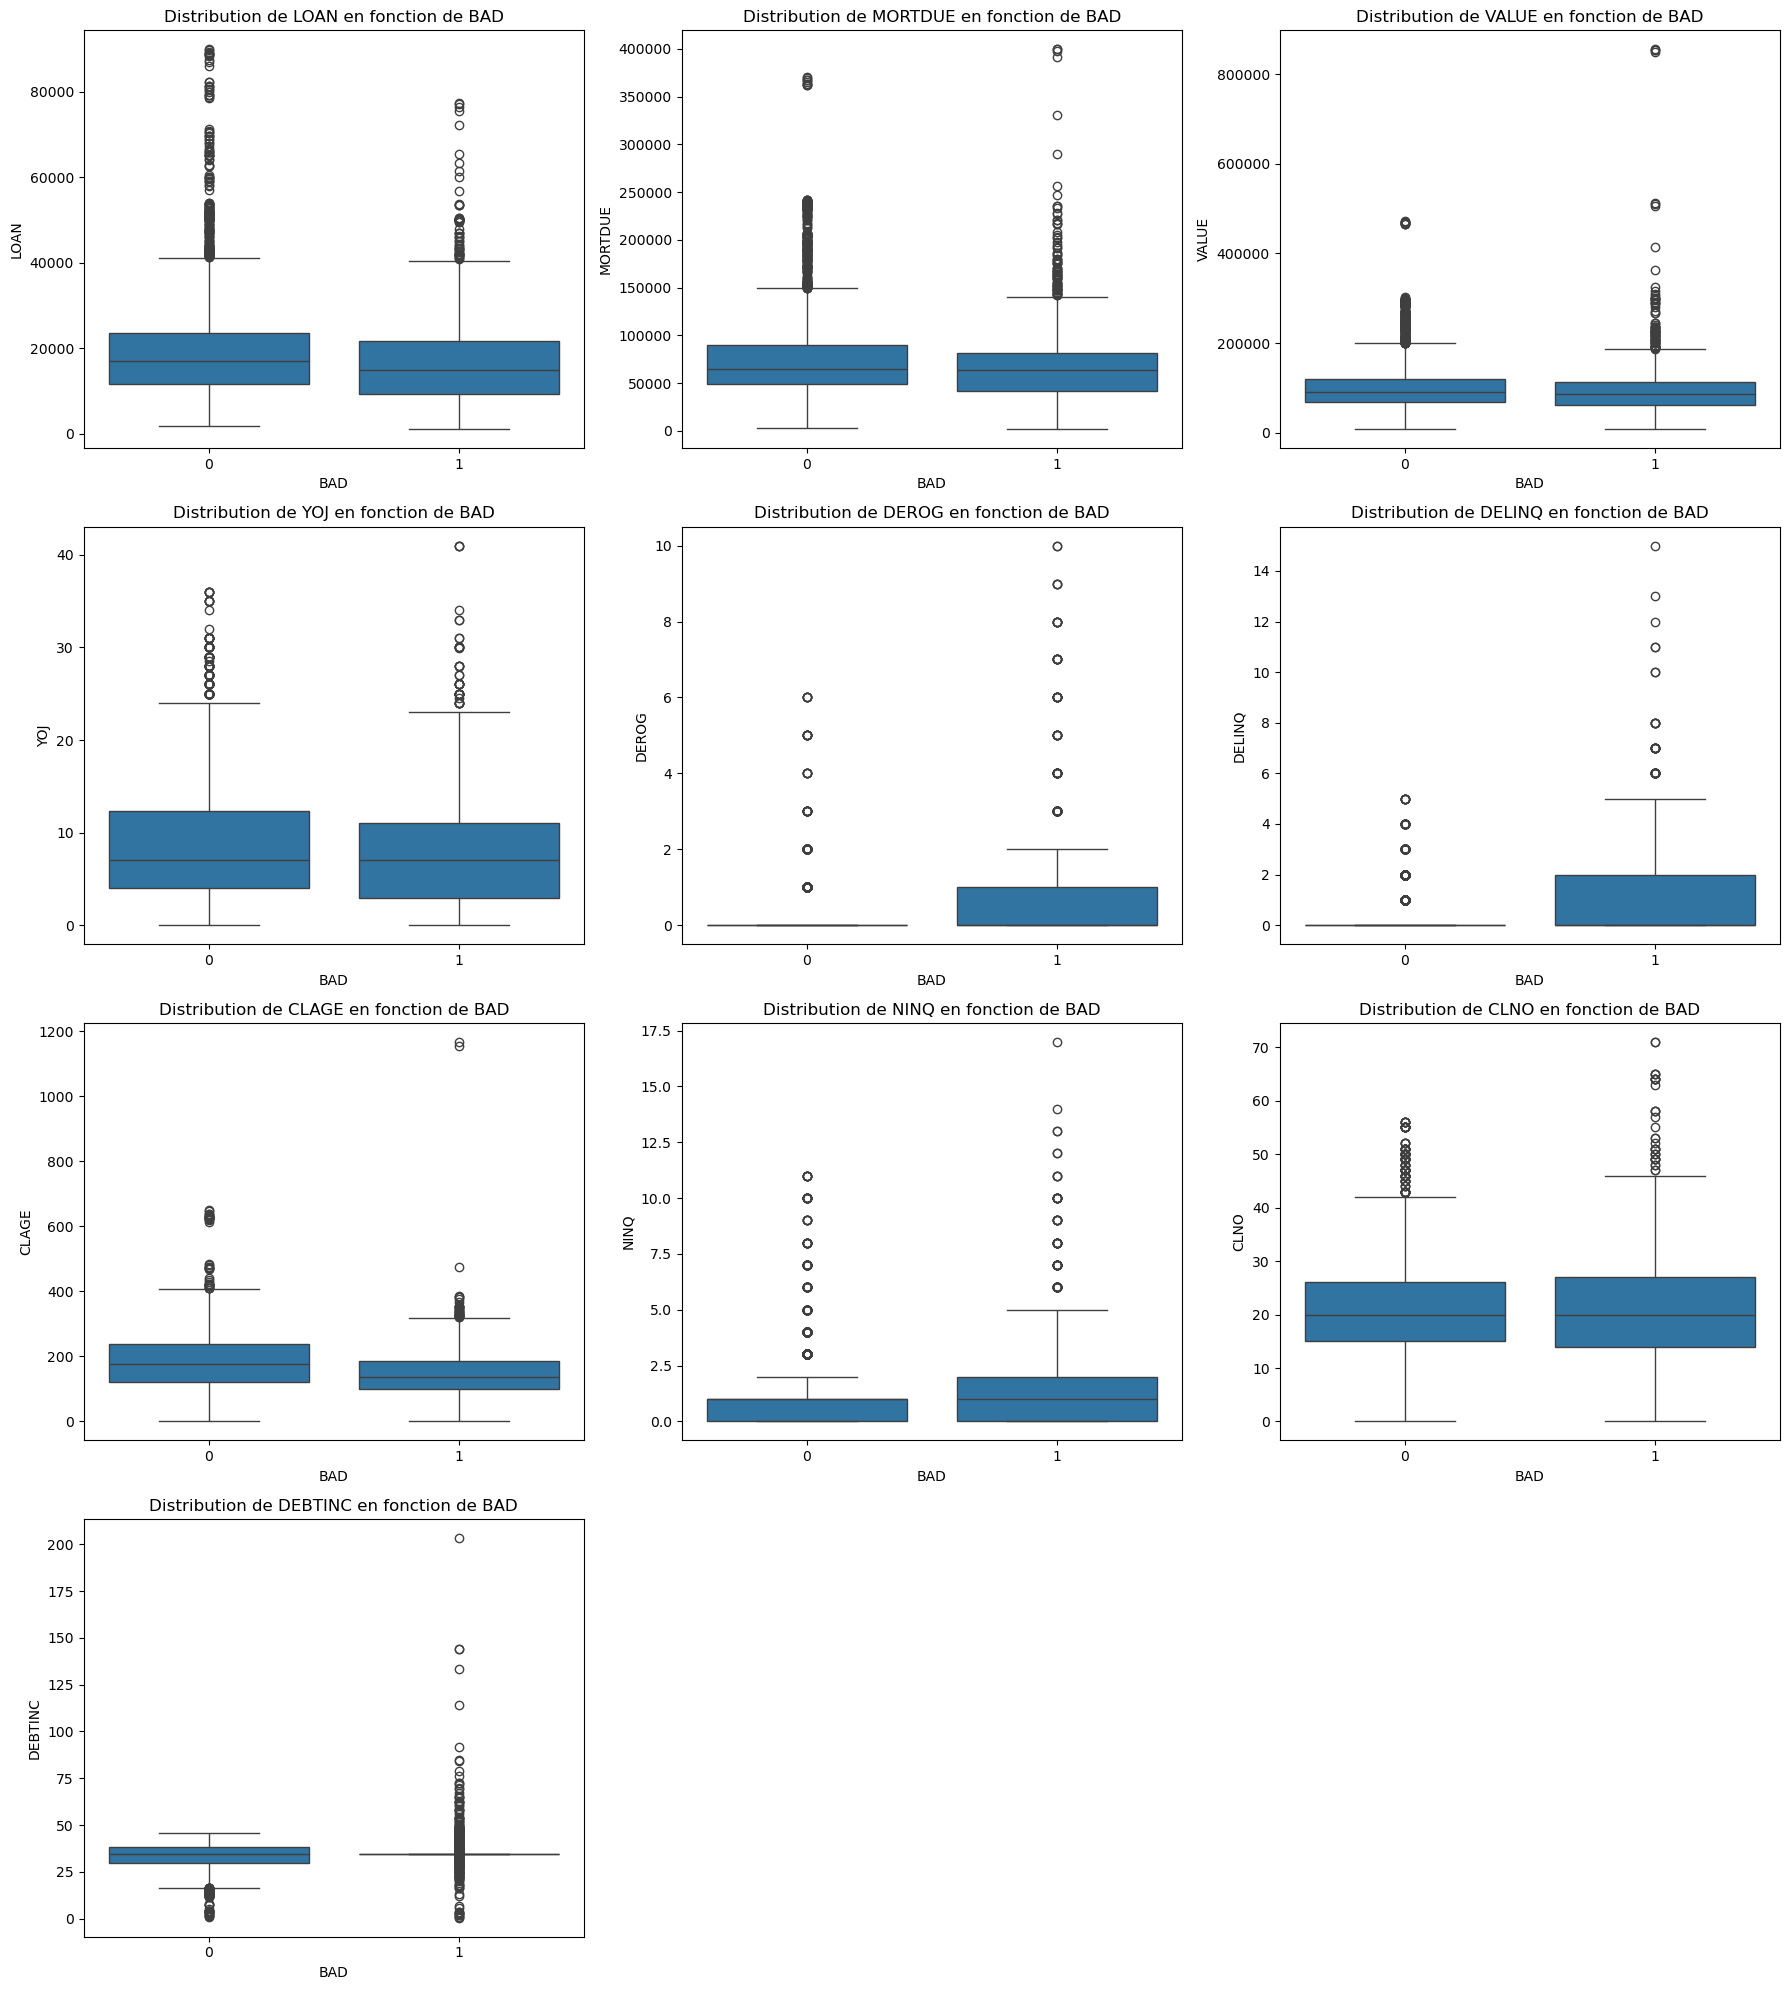

In [31]:

# Variables numériques
numerical_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Nombre total de variables
n_plots = len(numerical_columns)

# Configuration de la figure : 3 colonnes
fig, axes = plt.subplots(nrows=(n_plots // 3) + (n_plots % 3 != 0), ncols=3, figsize=(18, 5 * ((n_plots // 3) + 1)))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Création des boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='BAD', y=col, data=hmeq_data, ax=axes[i])
    axes[i].set_title(f'Distribution de {col} en fonction de BAD')

# Supprimer les axes inutilisés si le nombre de variables n'est pas un multiple de 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espace entre les subplots
plt.tight_layout()
plt.show()


# Tests statistiques
* ## Coéfficient de corrélation : Spearman 

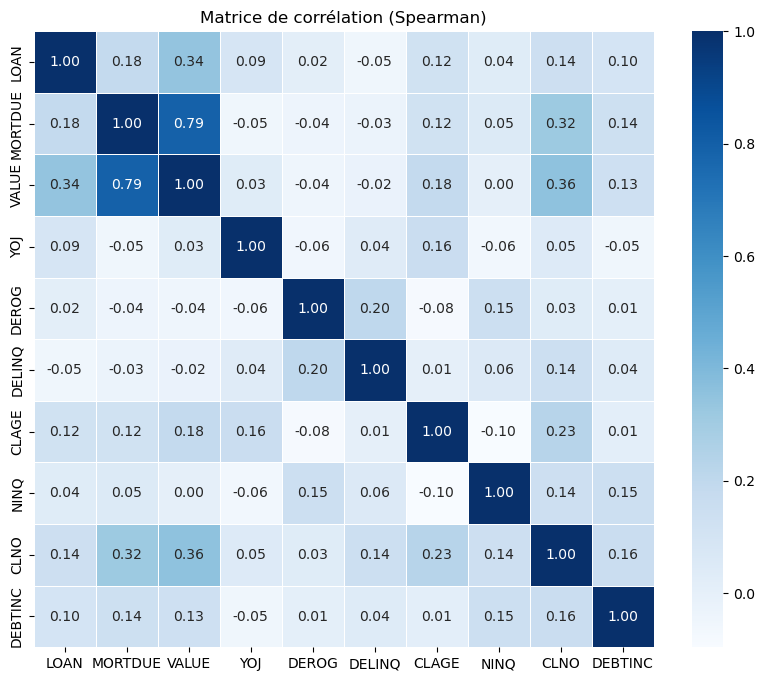

In [35]:
# Calcul de la matrice de corrélation avec la méthode Spearman
spearman_corr_matrix = hmeq_data[numerical_columns].corr(method='spearman')

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation (Spearman)')
plt.show()


In [37]:
from scipy.stats import mannwhitneyu

# Variables continues
numerical_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Liste pour stocker les résultats
mann_whitney_results = []

# Boucle pour effectuer le test pour chaque variable continue
for col in numerical_columns:
    # Séparer les données en fonction de la classe BAD
    group_0 = hmeq_data[hmeq_data['BAD'] == 0][col].dropna()
    group_1 = hmeq_data[hmeq_data['BAD'] == 1][col].dropna()
    
    # Effectuer le test de Mann-Whitney
    stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
    
    # Stocker les résultats
    mann_whitney_results.append({
        'Variable': col,
        'Mann-Whitney_Statistic': stat,
        'p_value': p_value
    })

# Convertir les résultats en DataFrame
mann_whitney_results_df = pd.DataFrame(mann_whitney_results)

# Afficher les résultats triés par p-value
print(mann_whitney_results_df.sort_values(by='p_value'))


  Variable  Mann-Whitney_Statistic        p_value
5   DELINQ               1905653.5  1.365317e-138
4    DEROG               2213337.5   4.722897e-95
6    CLAGE               3578883.5   1.828176e-44
7     NINQ               2291162.0   1.428265e-27
0     LOAN               3280550.0   5.871385e-17
9  DEBTINC               2489967.0   5.490478e-11
2    VALUE               3140211.0   1.040614e-08
1  MORTDUE               3136886.0   1.485962e-08
3      YOJ               3058533.0   2.747952e-05
8     CLNO               2894367.5   2.741574e-01


* ## Test du Chi-Deux de contingence

In [36]:
from scipy.stats import chi2_contingency

# Variables catégoriques
categorical_columns = ['REASON', 'JOB']

# Liste pour stocker les résultats
chi2_results = []

# Effectuer le test du chi² pour chaque variable catégorielle
for col in categorical_columns:
    # Créer une table de contingence entre la variable et BAD
    contingency_table = pd.crosstab(hmeq_data[col], hmeq_data['BAD'])
    
    # Effectuer le test du chi²
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Ajouter les résultats dans la liste
    chi2_results.append({
        'Variable': col,
        'Chi2': chi2,
        'p_value': p_value,
        'Degrees_of_Freedom': dof
    })

# Convertir les résultats en DataFrame pour une meilleure lisibilité
chi2_results_df = pd.DataFrame(chi2_results)

# Afficher les résultats
print(chi2_results_df)


  Variable       Chi2       p_value  Degrees_of_Freedom
0   REASON   8.185164  4.223437e-03                   1
1      JOB  73.815093  1.643694e-14                   5


In [19]:

from scipy.stats import chi2_contingency

# Liste des variables catégorielles
categorical_vars = ['REASON', 'JOB', 'BAD']

# Fonction pour effectuer le test de Chi-deux
def chi_square_test(var1, var2, data):
    contingency_table = pd.crosstab(data[var1], data[var2])  # Table de contingence
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Test de Chi-deux
    return chi2, p

# Effectuer le test pour chaque paire de variables catégorielles
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        chi2, p = chi_square_test(var1, var2, hmeq_data)
        print(f"Test de Chi-deux entre '{var1}' et '{var2}':")
        print(f" - Statistique de Chi2 : {chi2:.4f}")
        print(f" - p-valeur : {p:.4f}")
        if p < 0.05:
            print(" - Résultat : Les variables sont dépendantes (relation significative).\n")
        else:
            print(" - Résultat : Les variables sont indépendantes.\n")


Test de Chi-deux entre 'REASON' et 'JOB':
 - Statistique de Chi2 : 122.9086
 - p-valeur : 0.0000
 - Résultat : Les variables sont dépendantes (relation significative).

Test de Chi-deux entre 'REASON' et 'BAD':
 - Statistique de Chi2 : 8.4882
 - p-valeur : 0.0036
 - Résultat : Les variables sont dépendantes (relation significative).

Test de Chi-deux entre 'JOB' et 'BAD':
 - Statistique de Chi2 : 75.9647
 - p-valeur : 0.0000
 - Résultat : Les variables sont dépendantes (relation significative).



# MODELISATION

In [ ]:

# Transformation des variables catégorielles
#categorical_columns = ['REASON', 'JOB']
#numerical_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Création d'un pipeline avec un encodage OneHot et standardisation des variables numériques
#preprocessor = ColumnTransformer(
 #   transformers=[
 #       ('num', StandardScaler(), numerical_columns),
  #      ('cat', OneHotEncoder(), categorical_columns)
#    ]
#)
